In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
df = pd.read_csv('Data_Train.csv')
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [53]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [54]:
category = ['Airline', 'Source', 'Destination', 'Additional_Info']
for i in category:
    print(i, df[i].unique())
    print('-----------------------------------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
-----------------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
-----------------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
-----------------------------------------
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
-----------------------------------------


In [55]:
df.Date_of_Journey = df.Date_of_Journey.str.split('/')
df.Date_of_Journey
df['Date'] = df.Date_of_Journey.str[0]
df['Month'] = df.Date_of_Journey.str[1]
df['Year'] = df.Date_of_Journey.str[2]

In [56]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [57]:
df.Route = df.Route.str.split('→')

df['City1'] = df.Route.str[0]
df['City2'] = df.Route.str[1]
df['City3'] = df.Route.str[2]
df['City4'] = df.Route.str[3]
df['City5'] = df.Route.str[4]
df['City6'] = df.Route.str[5]

In [58]:
df.Dep_Time = df.Dep_Time.str.split(':')

In [59]:
df.Dep_Time

0        [22, 20]
1        [05, 50]
2        [09, 25]
3        [18, 05]
4        [16, 50]
           ...   
10678    [19, 55]
10679    [20, 45]
10680    [08, 20]
10681    [11, 30]
10682    [10, 55]
Name: Dep_Time, Length: 10683, dtype: object

In [60]:
df['Dep_Time_Hour'] = df.Dep_Time.str[0]
df['Dep_Time_Min'] = df.Dep_Time.str[1]

In [61]:
df.Arrival_Time = df.Arrival_Time.str.split(' ')
df['Arrival_date'] = df.Arrival_Time.str[1]

In [62]:
df['Time_of_arrival'] = df.Arrival_Time.str[0]

In [63]:
df['Time_of_arrival'] = df.Time_of_arrival.str.split(':')

In [64]:
df['Arrival_Time_Hour'] = df.Time_of_arrival.str[0]
df['Arrival_Time_Min'] = df.Time_of_arrival.str[1]

In [65]:
df.Duration = df.Duration.str.split(' ')
df['Travel_hours'] = df.Duration.str[0]
df['Travel_hours'] = df['Travel_hours'].str.split('h')
df['Travel_hours'] = df['Travel_hours'].str[0]
df.Travel_hours = df.Travel_hours

In [66]:
df['Travel_mins'] = df.Duration.str[1]
df.Travel_mins = df.Travel_mins.str.split('m')
df.Travel_mins = df.Travel_mins.str[0]

In [67]:
df.Total_Stops.replace('non-stop','0', inplace=True)

In [68]:
df.Total_Stops = df.Total_Stops.str.split(' ')
df.Total_Stops = df.Total_Stops.str[0]

In [69]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [70]:
df.Additional_Info.replace('No Info', 'No info', inplace=True)

In [71]:
df.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                    1
City3                 3492
City4                 9117
City5                10637
City6                10682
Dep_Time_Hour            0
Dep_Time_Min             0
Arrival_date          6348
Time_of_arrival          0
Arrival_Time_Hour        0
Arrival_Time_Min         0
Travel_hours             0
Travel_mins           1032
dtype: int64

In [72]:
df[df['City1'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
9039,Air India,"[6, 05, 2019]",Delhi,Cochin,NaN,"[09, 45]","[09:25, 07, May]","[23h, 40m]",NaN,No info,...,NaN,NaN,09,45,07,"[09, 25]",09,25,23,40


In [73]:
df['City3'].fillna('None', inplace=True)

In [74]:
df['Arrival_date'].fillna(df['Date'], inplace=True)

In [75]:
df['Travel_mins'].fillna(0, inplace=True)
df['Total_Stops'].fillna(0, inplace=True)

In [76]:
df[df['Travel_hours'] == '5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
6474,Air India,"[6, 03, 2019]",Mumbai,Hyderabad,"[BOM , GOI , PNQ , HYD]","[16, 50]",[16:55],[5m],2,No info,...,NaN,NaN,16,50,6,"[16, 55]",16,55,5m,0


In [77]:
df.drop(index = 6474, inplace=True, axis=0)

In [78]:
df.Total_Stops = df.Total_Stops.astype('int64')
df.Date = df.Date.astype('int64')
df.Month = df.Month.astype('int64')
df.Year = df.Year.astype('int64')
df.Dep_Time_Hour = df.Dep_Time_Hour.astype('int64')
df.Dep_Time_Min = df.Dep_Time_Min.astype('int64')
df.Arrival_date = df.Arrival_date.astype('int64')
df.Arrival_Time_Hour = df.Arrival_Time_Hour.astype('int64')
df.Arrival_Time_Min = df.Arrival_Time_Min.astype('int64')
df.Travel_hours = df.Travel_hours.astype('int64')
df.Travel_mins = df.Travel_mins.astype('int64')

In [79]:
categorical_data = ['Airline', 'Source', 'Destination', 'Additional_Info', 'City1', 'City2', 'City3']
numerical_data = ['Total_Stops', 'Date', 'Month', 'Year', 'Dep_Time_Hour', 'Dep_Time_Min', 'Arrival_date', 'Arrival_Time_Hour', 'Arrival_Time_Min', 'Travel_hours', 'Travel_mins']

/Users/vamsisujangogineni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vamsisujangogineni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vamsisujangogineni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

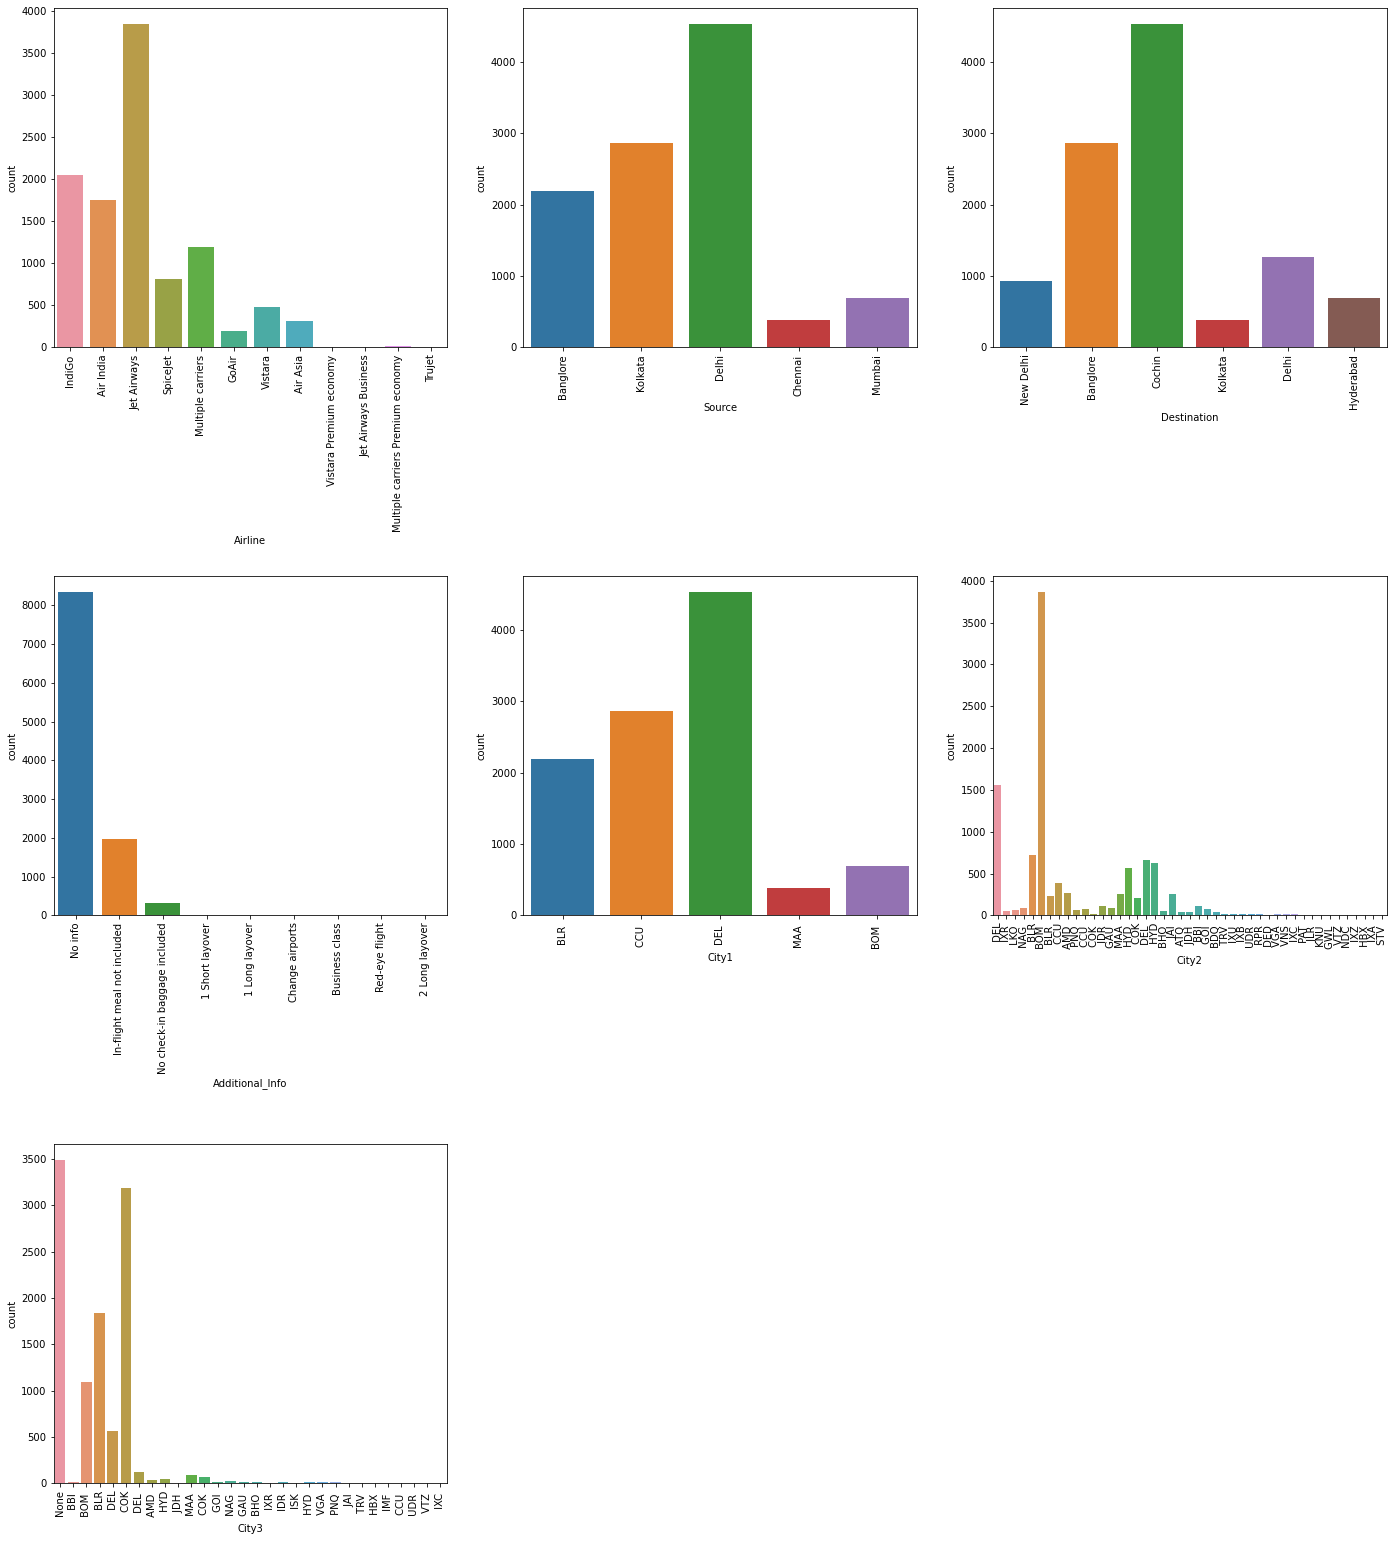

In [31]:
c=1
plt.figure(figsize=(20,45))
for i in categorical_data:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

<Figure size 1080x576 with 0 Axes>

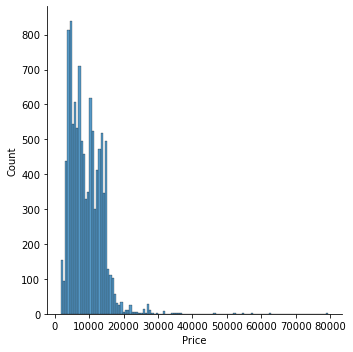

In [32]:
plt.figure(figsize=(15,8))
sns.displot(df.Price)

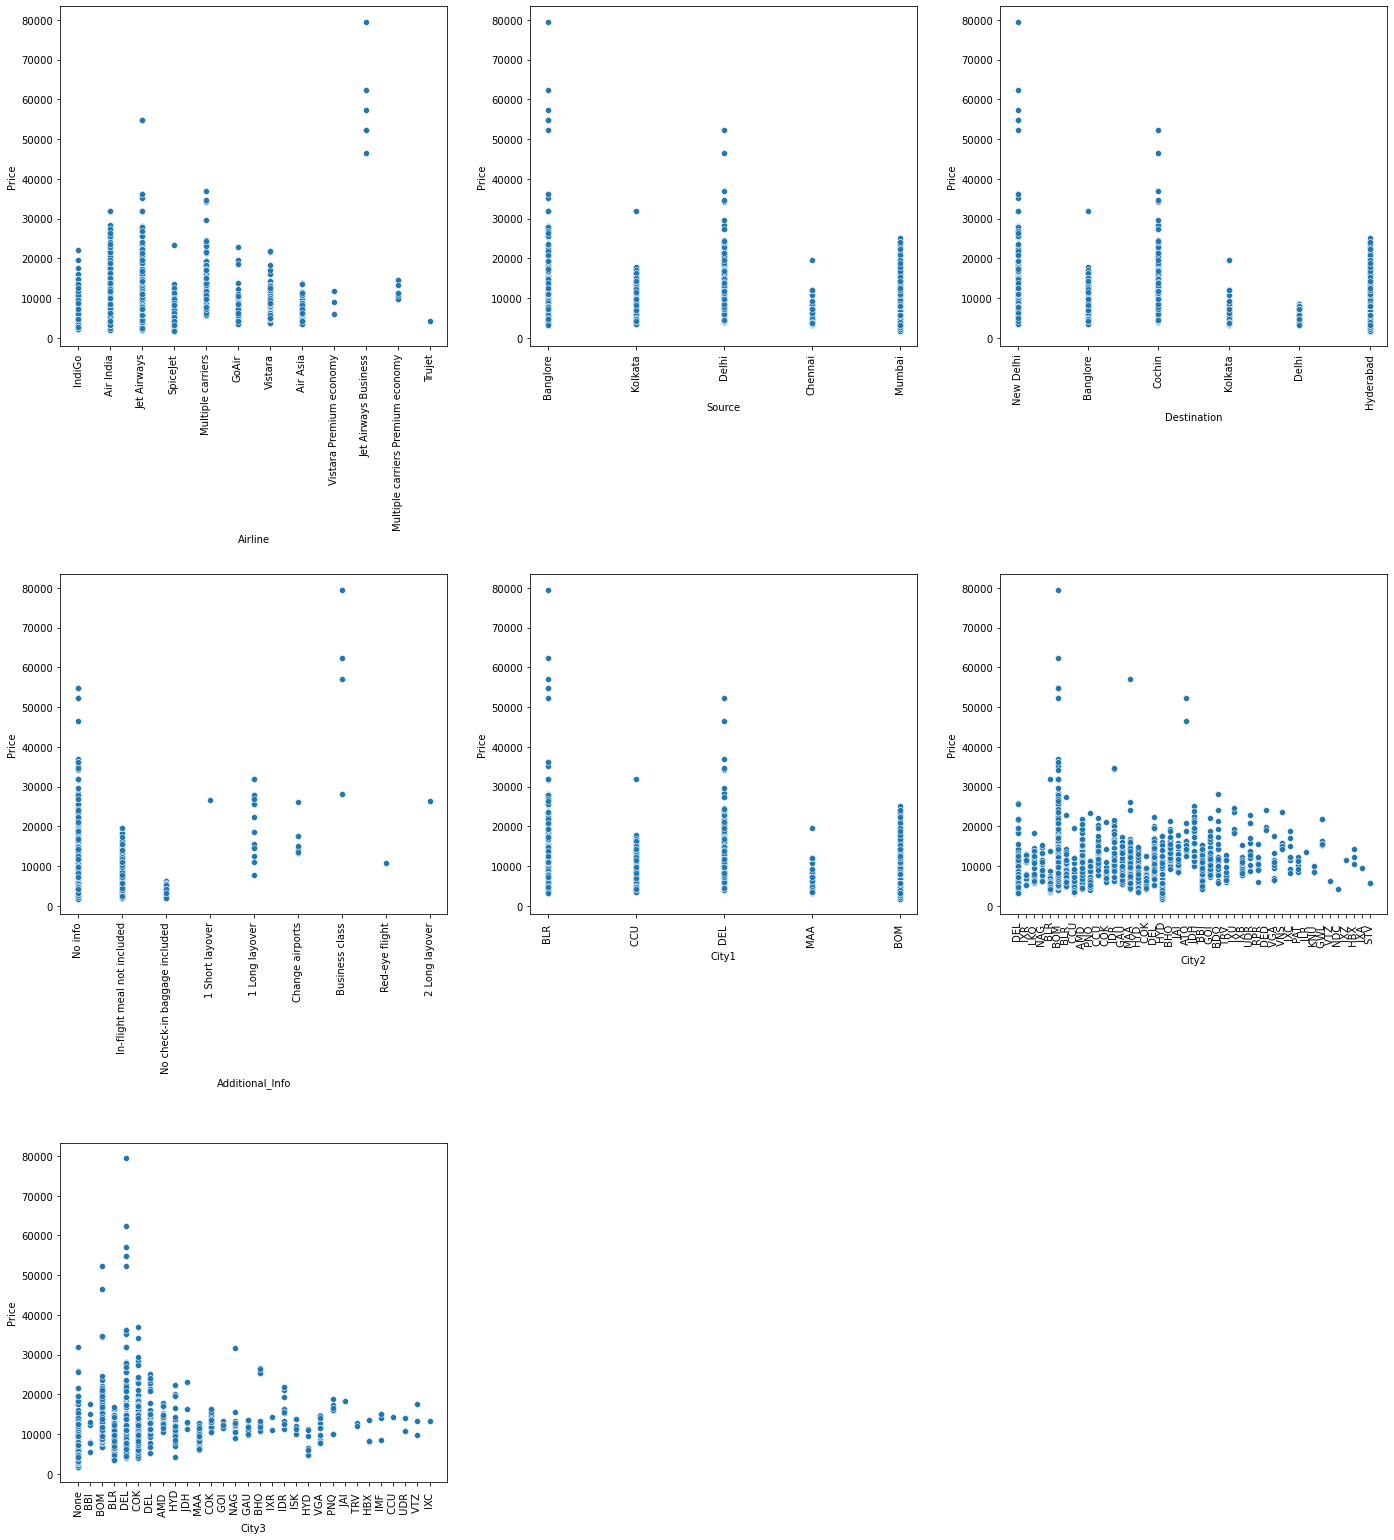

In [33]:
#Checking for relation of price with catgorical data
c=1
plt.figure(figsize=(20,45))
for i in categorical_data:
    plt.subplot(6,3,c)
    sns.scatterplot(x=df[i], y=df.Price)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

In [34]:
#Checking flights with high prices
df[df.Price >= 50000]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
657,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , BOM , DEL]","[05, 45]",[10:45],[5h],1,No info,...,NaN,NaN,5,45,1,"[10, 45]",10,45,5,0
1478,Jet Airways,"[18, 03, 2019]",Banglore,New Delhi,"[BLR , BOM , DEL]","[18, 40]","[00:45, 16, Mar]","[6h, 5m]",1,No info,...,NaN,NaN,18,40,16,"[00, 45]",0,45,6,5
2618,Jet Airways,"[18, 03, 2019]",Banglore,New Delhi,"[BLR , BOM , DEL]","[22, 50]","[05:05, 16, Mar]","[6h, 15m]",1,No info,...,NaN,NaN,22,50,16,"[05, 05]",5,5,6,15
2924,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , BOM , DEL]","[05, 45]",[11:25],"[5h, 40m]",1,Business class,...,NaN,NaN,5,45,1,"[11, 25]",11,25,5,40
5372,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , BOM , DEL]","[05, 45]",[12:25],"[6h, 40m]",1,Business class,...,NaN,NaN,5,45,1,"[12, 25]",12,25,6,40
5439,Jet Airways,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , BOM , DEL]","[16, 55]",[23:00],"[6h, 5m]",1,No info,...,NaN,NaN,16,55,1,"[23, 00]",23,0,6,5
9715,Jet Airways Business,"[6, 03, 2019]",Delhi,Cochin,"[DEL , ATQ , BOM , COK]","[20, 05]","[04:25, 07, Mar]","[8h, 20m]",2,No info,...,NaN,NaN,20,5,7,"[04, 25]",4,25,8,20
10364,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , MAA , DEL]","[09, 45]",[14:25],"[4h, 40m]",1,Business class,...,NaN,NaN,9,45,1,"[14, 25]",14,25,4,40


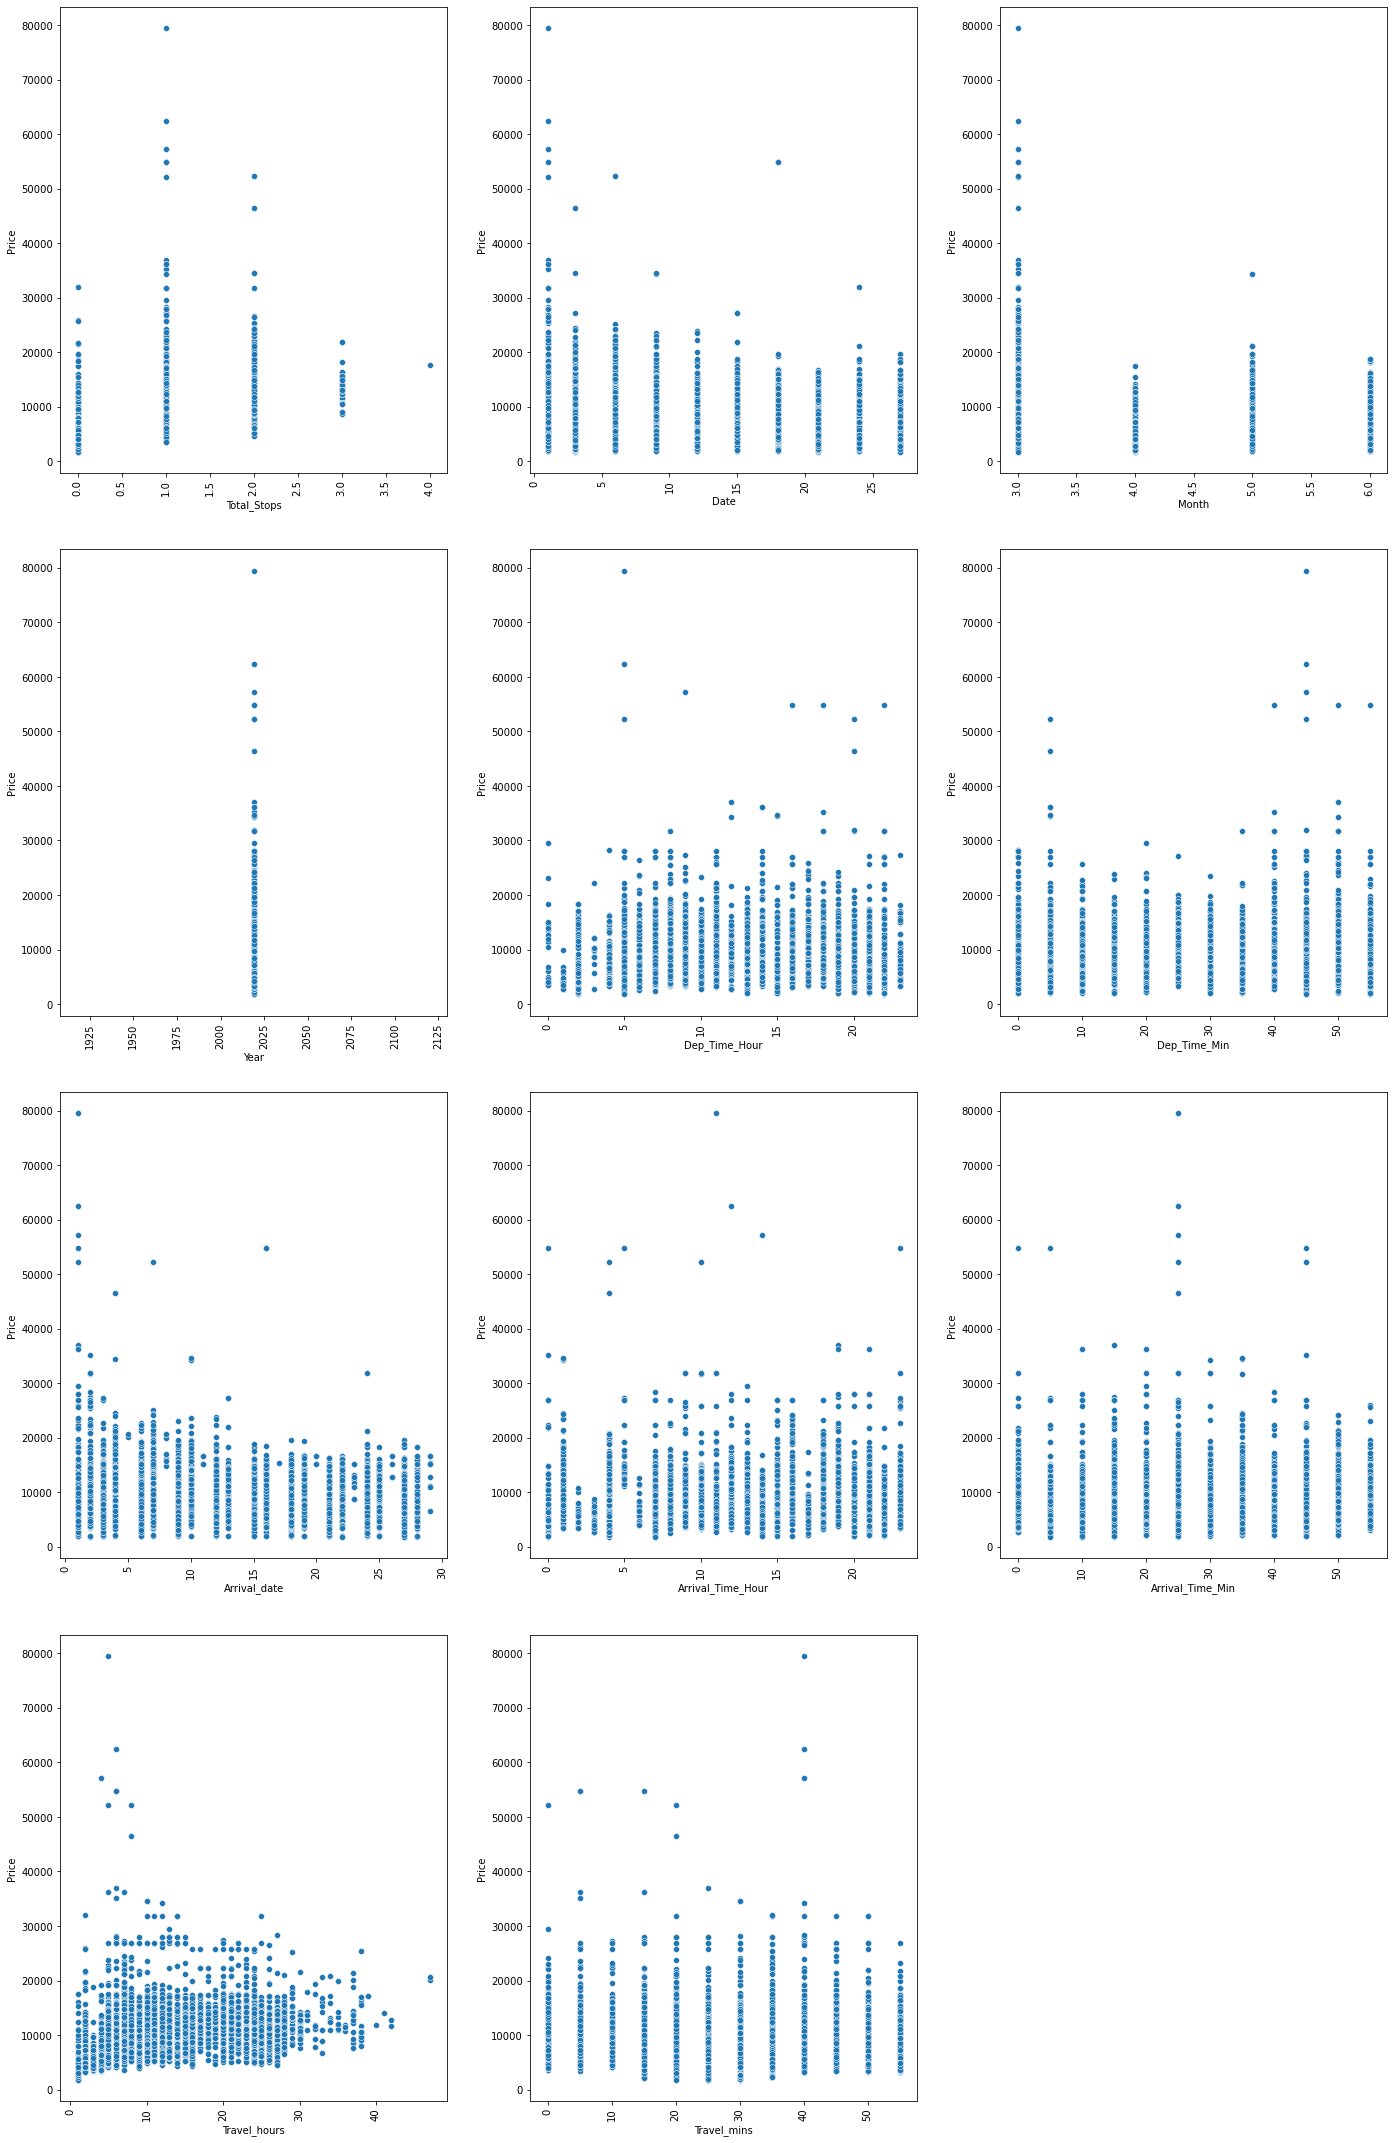

In [35]:
#Checking for relation of price with numerical data
c=1
plt.figure(figsize=(20,45))
for i in numerical_data:
    plt.subplot(6,3,c)
    sns.scatterplot(x=df[i], y=df.Price)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

In [80]:
df.skew()

/var/folders/ss/lrfblcp10k7ft5vqp6w7wc8w0000gn/T/ipykernel_58970/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Total_Stops          0.317345
Price                1.813248
Date                 0.118174
Month               -0.387708
Year                 0.000000
Dep_Time_Hour        0.113224
Dep_Time_Min         0.167210
Arrival_date         0.119667
Arrival_Time_Hour   -0.369876
Arrival_Time_Min     0.110928
Travel_hours         0.850822
Travel_mins         -0.091004
dtype: float64

In [81]:
#Using log transform to treat skews in data
df.Travel_hours = np.log(df.Travel_hours)

In [82]:
df.Travel_hours.skew()

-0.26612233332369917

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [84]:
for i in df.columns:
    if df[i].dtypes == 'object':
        #print('==================================')
        #print(df[i])
        #print('==================================')
        df[i] = le.fit_transform(df[i].astype(str))

In [41]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
0,3,24,0,5,18,211,233,240,0,7,...,5,1,22,20,22,12,1,10,0.693147,50
1,1,6,3,0,84,31,913,334,2,7,...,5,1,5,50,1,104,13,15,1.945910,25
2,4,43,2,1,118,70,412,117,2,7,...,5,1,9,25,10,30,4,25,2.944439,0
3,3,10,3,0,91,164,1324,310,1,7,...,5,1,18,5,12,217,23,30,1.609438,25
4,3,0,0,5,29,149,1237,302,1,7,...,5,1,16,50,1,194,21,35,1.386294,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,0,7,...,5,1,19,55,9,204,22,25,0.693147,30
10679,1,29,3,0,64,193,1309,237,0,7,...,5,1,20,45,27,215,23,20,0.693147,35
10680,4,29,0,2,18,58,829,288,0,7,...,5,1,8,20,27,83,11,20,1.098612,0
10681,10,0,0,5,18,92,938,238,0,7,...,5,1,11,30,1,114,14,10,0.693147,40


In [85]:
#Bring all the features to a common scale using Standard Scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_x = df.drop('Price', axis=1)
y = df['Price']

dataset = sc.fit_transform(df_x)
x = pd.DataFrame(dataset, columns=df_x.columns)

x

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
0,-0.410805,0.021565,-1.658435,2.416778,-1.547178,1.686574,-1.920772,0.421616,-1.220477,0.498649,...,0.064207,0.009676,1.654268,-0.234932,0.955750,-1.556999,-1.800319,-0.889984,-1.183304,1.278932
1,-1.261152,-1.437438,0.890299,-0.973732,0.249721,-1.260175,0.120081,1.288164,1.741835,0.498649,...,0.064207,0.009676,-1.303000,1.363674,-1.524648,-0.164455,-0.050813,-0.587017,0.052178,-0.196525
2,0.014369,1.561624,0.040721,-0.295630,1.175397,-0.621713,-1.383547,-0.712270,1.741835,0.498649,...,0.064207,0.009676,-0.607172,0.031502,-0.461621,-1.284545,-1.362943,0.018918,1.036933,-1.671983
3,-0.410805,-1.113215,0.890299,-0.973732,0.440302,0.917145,1.353597,1.066918,0.260679,0.498649,...,0.064207,0.009676,0.958440,-1.034235,-0.225392,1.545952,1.407109,0.321885,-0.279653,-0.196525
4,-0.410805,-1.923772,-1.658435,2.416778,-1.247695,0.671582,1.092488,0.993169,0.260679,0.498649,...,0.064207,0.009676,0.610527,1.363674,-1.524648,1.197816,1.115525,0.624852,-0.499718,0.983841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,1.399513,0.890299,-0.973732,-0.294794,1.228190,1.158516,0.384742,-1.220477,0.498649,...,0.064207,0.009676,1.132397,1.630108,-0.579735,1.349180,1.261317,0.018918,-1.183304,0.098566
10678,-1.261152,0.426844,0.890299,-0.973732,-0.294794,1.391899,1.308578,0.393961,-1.220477,0.498649,...,0.064207,0.009676,1.306354,1.097240,1.546321,1.515679,1.407109,-0.284050,-1.183304,0.393658
10679,0.014369,0.426844,-1.658435,0.382472,-1.547178,-0.818163,-0.132024,0.864109,-1.220477,0.498649,...,0.064207,0.009676,-0.781129,-0.234932,1.546321,-0.482318,-0.342397,-0.284050,-0.783432,-1.671983
10680,2.565411,-1.923772,-1.658435,2.416778,-1.547178,-0.261555,0.195113,0.403179,-1.220477,0.498649,...,0.064207,0.009676,-0.259258,0.297937,-1.524648,-0.013092,0.094979,-0.889984,-1.183304,0.688749


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
for i in [dt, svr, knn, lr]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train, i.predict(x_train))
    if abs(train_score-test_score) <= 0.1:
        print(i)
        print('R2 score is : ',r2_score(y_test, pred))
        print('R2 score train data is : ',r2_score(y_train, i.predict(x_train)))
        print('Mean absolute error is : ',mean_absolute_error(y_test, pred))
        print('Mean squared error is : ',mean_squared_error(y_test, pred))
        print('Root mean squared error is : ',mean_squared_error(y_test, pred, squared=False))
        print('------------------------------------------------------')

SVR()
R2 score is :  0.038321920730695735
R2 score train data is :  0.03311684643900281
Mean absolute error is :  3426.0001059007004
Mean squared error is :  19467220.633670017
Root mean squared error is :  4412.167339717525
------------------------------------------------------
KNeighborsRegressor()
R2 score is :  0.7672094437299513
R2 score train data is :  0.8157372685247666
Mean absolute error is :  1321.4163494539782
Mean squared error is :  4712372.277204367
Root mean squared error is :  2170.799916437341
------------------------------------------------------
LinearRegression()
R2 score is :  0.5213351487839295
R2 score train data is :  0.4956669983880354
Mean absolute error is :  2245.06994122044
Mean squared error is :  9689598.285619887
Root mean squared error is :  3112.8119579601794
------------------------------------------------------


In [88]:
#Importing random forest regressor, adaboost regressor and gradient boosting regressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

rfr = RandomForestRegressor()
ad = AdaBoostRegressor()
gbr = GradientBoostingRegressor()

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
for i in [rfr, ad, gbr]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train, i.predict(x_train))
    if abs(train_score-test_score) <= 0.1:
        print(i)
        print('R2 score is : ',r2_score(y_test, pred))
        print('R2 score tran data is : ',r2_score(y_train, i.predict(x_train)))
        print('Mean absolute error is : ',mean_absolute_error(y_test, pred))
        print('Mean squared error is : ',mean_squared_error(y_test, pred))
        print('Root mean squared error is : ',mean_squared_error(y_test, pred, squared=False))
        print('------------------------------------------------------')

RandomForestRegressor()
R2 score is :  0.8887200935793438
R2 score tran data is :  0.9777222447272507
Mean absolute error is :  657.2364418926281
Mean squared error is :  2287658.2091390574
Root mean squared error is :  1512.5006476491365
------------------------------------------------------
GradientBoostingRegressor()
R2 score is :  0.8205350631402333
R2 score tran data is :  0.843296742600655
Mean absolute error is :  1254.9710417431772
Mean squared error is :  3689385.166338162
Root mean squared error is :  1920.777229753144
------------------------------------------------------


In [47]:
#Importing cross val score from Model_selection
from sklearn.model_selection import cross_val_score

for i in range(2,9):
    cv = cross_val_score(rfr, x, y, cv=i)
    print(rfr, cv.mean())

RandomForestRegressor() 0.8532089031483365
RandomForestRegressor() 0.8667122921708729
RandomForestRegressor() 0.8781404910141075
RandomForestRegressor() 0.8857682682353231
RandomForestRegressor() 0.8823210520668857
RandomForestRegressor() 0.8843784178915387
RandomForestRegressor() 0.8859641718344482


In [48]:
for i in range(2,9):
    cv = cross_val_score(gbr, x, y, cv=i)
    print(gbr, cv.mean())

GradientBoostingRegressor() 0.8093064896493993
GradientBoostingRegressor() 0.8204161812383042
GradientBoostingRegressor() 0.8239352567430143
GradientBoostingRegressor() 0.8305760984196164
GradientBoostingRegressor() 0.8248493857758289
GradientBoostingRegressor() 0.8251747907286038
GradientBoostingRegressor() 0.827258751688316


In [90]:
#Selecting Gradient Boosting Regressor as our final model as it has good R2 score and overfitting is also less
model = GradientBoostingRegressor(alpha = 0.09, learning_rate = 0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

In [91]:
import joblib
joblib.dump(model, 'flight_price.obj')

['flight_price.obj']

In [92]:
model = joblib.load('flight_price.obj')
model.fit(x_train, y_train)
pred = model.predict(x_test)

predicted_values = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred, 'Diff' : y_test-pred})

In [93]:
predicted_values

,Actual,Predicted,Diff
8161,10703,10610.354795,92.645205
6423,13587,11585.895628,2001.104372
3102,12819,14316.128103,-1497.128103
5797,8610,9324.155677,-714.155677
7180,14714,14068.215011,645.784989
...,...,...,...
2216,3210,3516.894655,-306.894655
5327,1965,2311.243876,-346.243876
5663,8479,8487.567330,-8.567330
6160,11467,13672.476337,-2205.476337


In [94]:
print("Mean squared error: {0:.3f}".format(mean_squared_error(y_test, model.predict(x_test))))
print("Accuracy score (training): {0:.3f}".format(model.score(x_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(x_test, y_test)))

Mean squared error: 2647797.754
Accuracy score (training): 0.925
Accuracy score (validation): 0.871


In [100]:
n_classes, n_estimators = model.estimators_.shape
for c in range(n_classes):
    for t in range(n_estimators):
        dtree = model.estimators_[c, t]
        print("class={}, tree={}: {}".format(c, t, dtree.tree_))

        rules = pd.DataFrame({
            'child_left': dtree.tree_.children_left,
            'child_right': dtree.tree_.children_right,
            'feature': dtree.tree_.feature,
            'threshold': dtree.tree_.threshold,
        })
        print(rules)

class=0, tree=0: <sklearn.tree._tree.Tree object at 0x7fcbc8484110>
    child_left  child_right  feature  threshold
0            1           18       25  -0.389686
1            2            3        9  -3.081034
2           -1           -1       -2  -2.000000
3            4           11        1  -1.559021
4            5            8        1  -1.883244
5            6            7       24   1.079303
6           -1           -1       -2  -2.000000
7           -1           -1       -2  -2.000000
8            9           10        7   0.361696
9           -1           -1       -2  -2.000000
10          -1           -1       -2  -2.000000
11          12           15        7   0.426226
12          13           14        7   0.361696
13          -1           -1       -2  -2.000000
14          -1           -1       -2  -2.000000
15          16           17        8   1.001257
16          -1           -1       -2  -2.000000
17          -1           -1       -2  -2.000000
18          19      

In [101]:
from sklearn import tree
tree.export_graphviz(rules)

TypeError:     child_left  child_right  feature  threshold
0            1           32        7   1.569331
1            2           17        5  -1.088281
2            3           10       24   1.685238
3            4            7       15  -0.993805
4            5            6        9  -1.291193
5           -1           -1       -2  -2.000000
6           -1           -1       -2  -2.000000
7            8            9        5  -1.121023
8           -1           -1       -2  -2.000000
9           -1           -1       -2  -2.000000
10          11           14        5  -1.423883
11          12           13        7   1.412615
12          -1           -1       -2  -2.000000
13          -1           -1       -2  -2.000000
14          15           16        3   1.738676
15          -1           -1       -2  -2.000000
16          -1           -1       -2  -2.000000
17          18           25        5  -1.055540
18          19           22       14   0.324415
19          20           21        7   0.094356
20          -1           -1       -2  -2.000000
21          -1           -1       -2  -2.000000
22          23           24       23   0.094979
23          -1           -1       -2  -2.000000
24          -1           -1       -2  -2.000000
25          26           29       14   2.071716
26          27           28       14   0.948451
27          -1           -1       -2  -2.000000
28          -1           -1       -2  -2.000000
29          30           31       14   2.321330
30          -1           -1       -2  -2.000000
31          -1           -1       -2  -2.000000
32          33           42       11  -1.038242
33          34           41       21   1.428206
34          35           38       10   0.352746
35          36           37        1   0.994234
36          -1           -1       -2  -2.000000
37          -1           -1       -2  -2.000000
38          39           40        9  -0.694579
39          -1           -1       -2  -2.000000
40          -1           -1       -2  -2.000000
41          -1           -1       -2  -2.000000
42          43           48       11  -0.179312
43          44           45        1  -0.059490
44          -1           -1       -2  -2.000000
45          46           47       10   1.414196
46          -1           -1       -2  -2.000000
47          -1           -1       -2  -2.000000
48          49           52       20  -0.901018
49          50           51        1   1.358985
50          -1           -1       -2  -2.000000
51          -1           -1       -2  -2.000000
52          53           54       13   0.398054
53          -1           -1       -2  -2.000000
54          -1           -1       -2  -2.000000 is not an estimator instance.